In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import DataSource.GetData as GetData
import ANNModels.AnnModel as AnnModel

In [2]:
# define the data set size.
N = 100 # Number of training samples
D = 2   # Dimensions
K = 3   # Number of classes 

## Defining Neural Network Parameters
h = [10,50] # Number of hidden neurons
step_size = 1e-0
reg_type = 'L1'
reg = 1e-4 # regularization weight

# Generate Spiral Data
$$x = r \times \left(sin(2\pi \times t) + cos(2\pi \times t) \right) $$

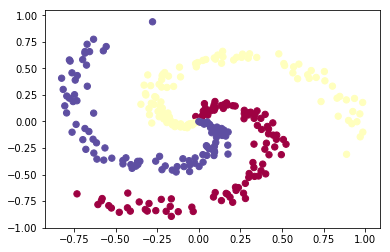

In [3]:
# Generate data
spiral_data = GetData.SpiralDataGen(dim = D, num_samples = N, num_classes = K)
spiral_data.GetData(disp=True)

# 
X = spiral_data.data
y = spiral_data.class_type

In [4]:
##  Defining ANN MLP 
mlp_model = AnnModel.MLPModel(dim_in = D, hidden_layer_dim = h, dim_out = K, 
                             reg_type = reg_type, reg = reg, prune=True, prune_thr = 1e-5 )

In [14]:
#Train the Neural Network
for i in range(10000):
    
    # forward pass
    mlp_model.ForwardPass(X)
    
    #Compute Loss
    loss = mlp_model.Loss(y)
    
    mlp_model.BackwardPass(X,y)
    
    mlp_model.WeightUpdate(step_size)
    if i%1000 == 0:
        print('itr %d: loss %f' % (i,loss))
        #step_size = step_size/2

itr 0: loss 0.715230
itr 1000: loss 0.744772
itr 2000: loss 0.744663
itr 3000: loss 0.744612
itr 4000: loss 0.744586
itr 5000: loss 0.713623
itr 6000: loss 0.743183
itr 7000: loss 0.719015
itr 8000: loss 0.713716
itr 9000: loss 0.743171


In [15]:
precission = mlp_model.AnnAccuracy(X,y)
print("Training Accuracy %f" % (precission) )

Training Accuracy 0.660000


Non-zero W[0] 0.850000
Non-zero W[1] 0.460000
Non-zero W[2] 0.212000
Non-zero W[3] 0.726667


<module 'matplotlib.pyplot' from 'C:\\Users\\narco\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

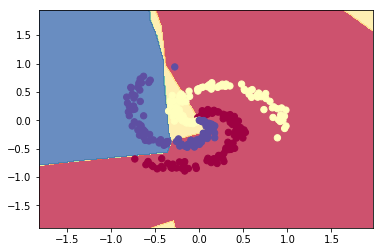

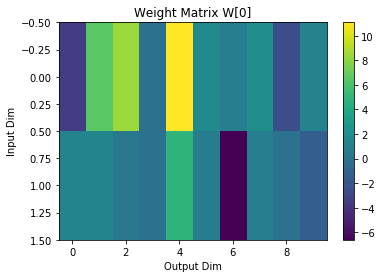

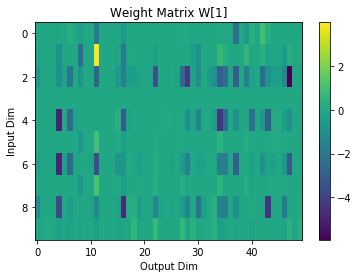

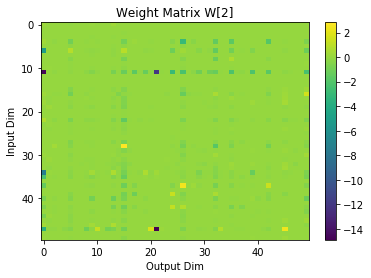

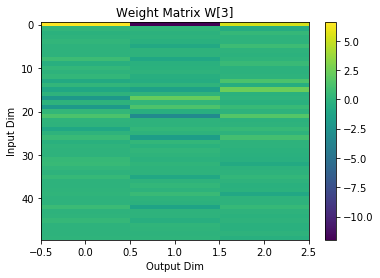

In [16]:
mlp_model.AnnVisualize(X,y)